In [83]:
import pandas as pd
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [60]:
stations = {'name': ['İSTANBUL SABİHA GÖKÇEN HAVALİMANI', 'İSTANBUL BÖLGE', 'SAMANDIRA HAVALİMANI', 'ÇATALCA RADAR SAHASI', 'SARIYER', 'İSTANBUL ATATÜRK HAVALİMANI', 'KADIKÖY GÖZTEPE RIHTIM', 
                     'SİLİVRİ TPAO ŞAMANDIRA', 'KAMİLOBA AKOM', 'FATİH/İST.DEN.BİL.ENS.', 'BÜYÜKÇEKMECE', 'KADIKÖY/GÖZTEPE', 'SARIYER/RUMELİ FENERİ BAL. BAR. ANA MENDİREK FENER', 'EYÜPSULTAN',
                     'SİLİVRİ ANA MENDİREK FENERİ', 'TUZLA İTÜ GÜNEY MENDİREK FENERİ', 'ŞİLE', 'FLORYA', 'GÜNGÖREN/DAVUTPAŞA MARMARA', 'FATİH/KUMKAPI FENER', 'TUZLA', 'SİLİVRİ', 'ARNAVUTKÖY',
                     'ÇEKMEKÖY/ÖMERLİ', 'BEYKOZ/ANADOLU FENERİ', 'ÜSKÜDAR', 'SANCAKTEPE', 'ŞİŞLİ', 'ÜMRANİYE', 'BEYKOZ', 'ADALAR ŞAMANDIRA', 'ŞİLE/İSAKÖY', 'SİLİVRİ ORMAN SAHASI', 'ARNAVUTKÖY/TERKOS BARAJI',
                     'ÇATALCA', 'ÇAVUŞBAŞI AKOM', 'HADİMKÖY AKOM', 'ÖMERLİ AKOM', 'KAĞITHANE AKOM', 'ÇANTA AKOM', 'İSTANBUL HAVALİMANI', 'SARIYER/YAVUZ SULTAN SELİM KÖPRÜSÜ', 'KARTAL/AYDOS DAĞI',
                     'TUZLA AYDINLI LİMAN FENERİ', 'İSTANBUL BOĞAZI KARADENİZ ÇIKIŞI ŞAMANDIRA', 'ŞİLE/DARLIK KÖYÜ', 'PENDİK/ÖMERLİ BARAJI', 'BEYLİKDÜZÜ', 'SARIYER/İTÜ MASLAK YERLEŞKESİ', 'OLİMPİYAT AKOM',
                     'TERKOS AKOM', 'BÜYÜKADA AKOM', 'AKSARAY AKOM'],
            'code': [17063, 17064, 17065, 17047, 17061, 17060, 17062, 17388, 20017, 17603, 18099, 17813, 17455, 18101, 17438, 17448, 17610, 17636, 17814, 17454, 18100, 18400, 18402, 18397, 18421,
                     18404, 18399, 18401, 18403, 18396, 17389, 18735, 18793, 18734, 19111, 20009, 20011, 20023, 20016, 20008, 17058, 19365, 19112, 17437, 17390, 18792, 18736, 19110, 18980, 20022,
                     20030, 20007, 20002],
            'lat': [40.897700, 40.911345, 40.986581, 41.340943, 41.146382, 40.981900, 40.988300, 41.039565, 41.047550, 41.015546, 41.045278, 40.979451, 41.230000, 41.102778, 41.073056, 40.812778,
                    41.168800, 40.975837, 41.026600, 41.004200, 40.827778, 41.185556, 41.220278, 41.078333, 41.223333, 41.032778, 41.008611, 41.054722, 41.029444, 41.141667, 40.932780, 41.108330,
                    41.306389, 41.336390, 41.168037, 41.076074, 41.138262, 40.999284, 41.085381, 41.085023, 41.264714, 41.209930, 40.931748, 40.851389, 41.475959, 41.043056, 41.008330, 40.965729,
                    41.099909, 41.084917, 41.304392, 40.852750, 41.002000],
            'lon': [29.303300, 29.155803, 29.213521, 28.356803, 29.050195, 28.820800, 29.018950, 28.187255, 28.418800, 28.960097, 28.590000, 29.057147, 29.115300, 28.924167, 28.239444, 29.297778,
                    29.600651, 28.786531, 28.885300, 28.954700, 29.293056, 28.157500, 28.707500, 29.325556, 29.165833, 29.046389, 29.282222, 28.968333, 29.138333, 29.073889, 28.948890, 29.828330,
                    28.186944, 28.617500, 28.490868, 29.136627, 28.623900, 29.329763, 28.961973, 28.078444, 28.728836, 29.104873, 29.228568, 29.271667, 28.716918, 29.571667, 29.341940, 28.622512,
                    29.025127, 28.766194, 28.658664, 29.117802, 28.943300]}

In [77]:

def data_from_mgm(path, stations):
    i = 1
    all_stations = {'name': [],
                    'code': []}
    
    mgm_xlsx_data = xlwings.Book(path).sheets['Report']
    loop = True

    while loop:
        row = mgm_xlsx_data.range('B' + str(i)).value

        if row is not None and type(row) is str and 'Yıl/Ay' in row:
            if len(row.split('/')) == 5:
                station_name = row.split('/')[3][4:]
                station_id = row.split('/')[4]
            if len(row.split('/')) == 6:
                station_name = row.split('/')[3][4:] + '/' + row.split('/')[4]
                station_id = row.split('/')[5]

            if station_name not in all_stations['name']:
                all_stations['name'].append(station_name)
                all_stations['code'].append(int(station_id))
        if row is not None and type(row) is str and 'Notları' in row:
            break
        i += 1
    return all_stations


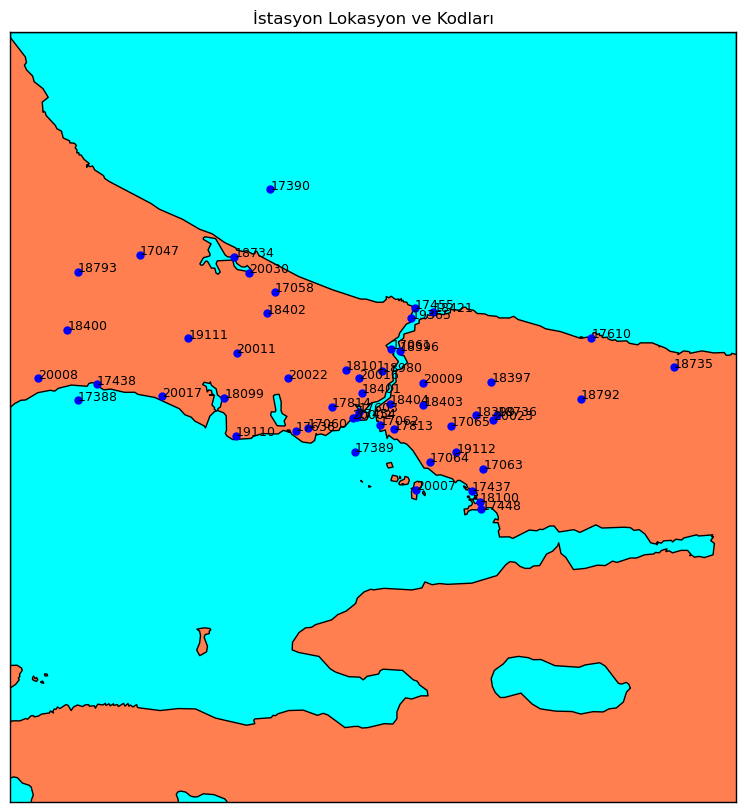

In [114]:
lats = stations['lat']
lons = stations['lon']
names = stations['name']
codes = stations['code']

fig = plt.figure(figsize = (30, 10))
map = Basemap(projection='merc', lat_0=41.0, lon_0=29.0,
              resolution='h', area_thresh=0.1,
              llcrnrlon=28, llcrnrlat=40.2,
              urcrnrlon=30, urcrnrlat=41.8)

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='coral', lake_color='aqua')
map.drawmapboundary(fill_color='aqua')

for lon, lat, code in zip(lons, lats, codes):
    x, y = map(lon, lat)
    map.plot(x, y, 'bo', markersize=5)
    plt.text(x, y, code, fontsize=9)

plt.title('İstasyon Lokasyon ve Kodları')
plt.show()